<a href="https://colab.research.google.com/github/xcellentbird/Deep_Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/k_%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8F%84%EB%AF%B8%EC%99%80_%EB%B9%99%EC%96%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

# 물고기 길이와 무게를 짝지어 객체로 만든다
fish_data = np.column_stack((fish_length, fish_weight))

# 물고기 타겟값. concatenate는 np행렬을 잇는다. 1
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [4]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련셋과 테스트셋으로 나누다. random_state는 42번
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

# 49행 2열(49 객체, 2개의 속성)
print("원 데이터셋: ", fish_data.shape)
print("훈련셋: ", train_input.shape, train_target.shape)
print("테스트셋: ", test_input.shape, test_target.shape)

원 데이터셋:  (49, 2)
훈련셋:  (36, 2) (36,)
테스트셋:  (13, 2) (13,)


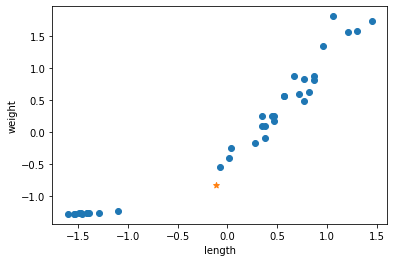

In [6]:
import matplotlib.pyplot as plt

# axis를 0으로 설정해야 각 열의 통계 값을 계산한다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

# 각 특성(여기에서는 length, weight)의 스케일이 다르기 때문에 이를 평균을 빼고 분산으로 나눠줘야한다.
train_scaled = (train_input - mean) / std

new_data = ([25, 150] - mean) /std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0], new_data[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# 스케일된 학습 데이터를 k-최근접 모델에 학습시킨다.
kn.fit(train_scaled, train_target)

# 테스트셋 또한 스케일 과정을 거친다
test_scaled = (test_input - mean) / std

# 테스트 결과 출력
kn.score(test_scaled, test_target)

1.0

In [8]:
print(kn.predict([new_data]))

[1.]


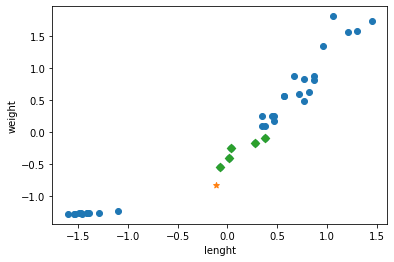

In [9]:
distances, indexes = kn.kneighbors([new_data])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_data[0], new_data[1], marker='*')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()